#### 开始之前，导入numpy、pandas包和数据

In [1]:
#加载所需的库
import numpy as np
import pandas as pd

In [5]:
#加载数据train.csv
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2 第二章：数据清洗及特征处理
我们拿到的数据通常是不干净的，所谓的不干净，就是数据中有缺失值，有一些异常点等，需要经过一定的处理才能继续做后面的分析或建模，所以拿到数据的第一步是进行数据清洗，本章我们将学习缺失值、重复值、字符串和数据转换等操作，将数据清洗成可以分析或建模的亚子。

### 2.1 缺失值观察与处理
我们拿到的数据经常会有很多缺失值，比如我们可以看到Cabin列存在NaN，那其他列还有没有缺失值，这些缺失值要怎么处理呢

#### 2.1.1 任务一：缺失值观察
(1) 请查看每个特征缺失值个数  
(2) 请查看Age， Cabin， Embarked列的数据
以上方式都有多种方式，所以大家多多益善

In [8]:
#写入代码
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#写入代码 info()不为空的数量
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#写入代码
df[['Age','Cabin','Embarked']]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


#### 2.1.2 任务二：对缺失值进行处理
(1)处理缺失值一般有几种思路

(2) 请尝试对Age列的数据的缺失值进行处理

(3) 请尝试使用不同的方法直接对整张表的缺失值进行处理  


In [ ]:
#处理缺失值的一般思路：
#提醒：可使用的函数有--->dropna函数与fillna函数




In [21]:
df1 = df.fillna({'Age':0})
df1
#查看补零是否成功
df1.isnull().sum()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
#方法二
df.loc[df['Age'].isnull(),'Age']=0
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
#方法三
df.dropna(subset=['Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [39]:
#对整张表
df = df.fillna(0)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

【回顾&引言】前面一章的内容大家可以感觉到我们主要是对基础知识做一个梳理，让大家了解数据分析的一些操作，主要做了数据的各个角度的观察。那么在这里，我们主要是做数据分析的流程性学习，主要是包括了数据清洗以及数据的特征处理，数据重构以及数据可视化。这些内容是为数据分析最后的建模和模型评价做一个铺垫。

【思考1】dropna和fillna有哪些参数，分别如何使用呢?  

【思考】检索空缺值用`np.nan`,`None`以及`.isnull()`哪个更好，这是为什么？如果其中某个方式无法找到缺失值，原因又是为什么？

#思考回答

- DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)   
  dropna(axis=0)删除所有有缺失值的行，.dropna(axis=1)删除所有有缺失值的列   

- DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)
  1)value:需要用什么值去填充缺失值  
  2)axis:确定填充维度，从行开始或是从列开始   
  3)method：ffill:用缺失值前面的一个值代替缺失值   
  4)backfill/bfill，缺失值后面的一个值代替前面的缺失值   

- 数值列读取数据后，空缺值的数据类型为float64所以用None一般索引不到，比较的时候一般用np.nan



【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

### 2.2 重复值观察与处理
由于这样那样的原因，数据中会不会存在重复值呢，如果存在要怎样处理呢

#### 2.2.1 任务一：请查看数据中的重复值

In [40]:
#写入代码
df = pd.read_csv('train.csv')
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

[注]：全部是false说明没有重复值

In [42]:
example = pd.DataFrame({'name':['rxy','mb','mb'],'Age':['15','20','20'],'sex':['女','男','男']})
example

,name,Age,sex
0,rxy,15,女
1,mb,20,男
2,mb,20,男


In [43]:
example.duplicated()

0    False
1    False
2     True
dtype: bool

#### 2.2.2 任务二：对重复值进行处理
(1)重复值有哪些处理方式呢？

(2)处理我们数据的重复值

方法多多益善

In [44]:
#重复值有哪些处理方式：

#drop_duplicates去掉重复行

example1 = example.drop_duplicates()     
example1.head()


,name,Age,sex
0,rxy,15,女
1,mb,20,男


####  2.2.3 任务三：将前面清洗的数据保存为csv格式

In [45]:
#写入代码
example.to_csv('test_clear.csv')



### 2.3 特征观察与处理
我们对特征进行一下观察，可以把特征大概分为两大类：  
数值型特征：Survived ，Pclass， Age ，SibSp， Parch， Fare，其中Survived， Pclass为离散型数值特征，Age，SibSp， Parch， Fare为连续型数值特征  
文本型特征：Name， Sex， Cabin，Embarked， Ticket，其中Sex， Cabin， Embarked， Ticket为类别型文本特征，数值型特征一般可以直接用于模型的训练，但有时候为了模型的稳定性及鲁棒性会对连续变量进行离散化。文本型特征往往需要转换成数值型特征才能用于建模分析。

#### 2.3.1 任务一：对年龄进行分箱（离散化）处理
(1) 分箱操作是什么？

(2) 将连续变量Age平均分箱成5个年龄段，并分别用类别变量12345表示  

(3) 将连续变量Age划分为[0,5) [5,15) [15,30) [30,50) [50,80)五个年龄段，并分别用类别变量12345表示  

(4) 将连续变量Age按10% 30% 50% 70% 90%五个年龄段，并用分类变量12345表示

(5) 将上面的获得的数据分别进行保存，保存为csv格式

#分箱操作是什么：

数据分箱（也称为离散分箱或分段）是一种数据预处理技术，用于减少次要观察误差的影响，是一种将多个连续值分组为较少数量的“分箱”的方法。


In [47]:
#将连续变量Age平均分箱成5个年龄段，并分别用类别变量12345表示
df['Age bins'] = pd.cut(df['Age'], 5,labels = [1,2,3,4,5])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

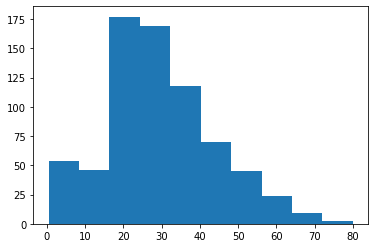

In [48]:
from matplotlib import pyplot as plt
plt.hist(df['Age'])

In [52]:
#将连续变量Age划分为[0,5) [5,15) [15,30) [30,50) [50,80)五个年龄段，并分别用类别变量12345表示

df['Age bins'] = pd.cut(df['Age'],[0,5,15,30,50,80],labels = [1,2,3,4,5])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


In [56]:
#将连续变量Age按10% 30% 50% 70% 90%五个年龄段，并用分类变量12345表示
df = pd.read_csv('train.csv')
df['Age bins'] = pd.qcut(df['Age'],[0,0.1,0.3,0.5,0.7,0.9],labels = [1,2,3,4,5])
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

#### 2.3.2 任务二：对文本变量进行转换
(1) 查看文本变量名及种类  
(2) 将文本变量Sex， Cabin ，Embarked用数值变量12345表示  
(3) 将文本变量Sex， Cabin， Embarked用one-hot编码表示

In [78]:
#查看类别文本变量名及种类

#方法一: value_counts
df['Sex'].value_counts()
df['Cabin'].value_counts()


147    687
63       4
145      4
47       4
62       3
      ... 
124      1
76       1
72       1
125      1
60       1
Name: Cabin, Length: 148, dtype: int64

In [62]:
#方法二uinque
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [59]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [73]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [76]:
#将文本变量Sex， Cabin ，Embarked用数值变量12345表示  

#方法一: replace
df['Sex_num'] = df['Sex'].replace(['male','female'],[1,2])
df['Embarked_num'] = df['Embarked'].replace(['S', 'C', 'Q'],[1,2,3])

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age bins,Sex_num,Embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,2,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,2,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,1,1.0


In [79]:

#方法二: 使用sklearn.preprocessing的LabelEncoder
from sklearn.preprocessing import LabelEncoder
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age bins,Sex_num,Embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,147,2,2,1,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,81,0,5,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,147,2,3,2,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,55,2,4,2,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,147,2,4,1,1.0


In [ ]:
df['Cabin'] = LabelEncoder().fit_transform(df['Cabin'])

df.head()

In [89]:
#将文本变量Sex， Cabin， Embarked用one-hot编码表示
for column in ['Cabin','Embarked']:
    x = pd.get_dummies(df[column],prefix = column)
    df = pd.concat([df, x],axis = 1)
df.head()
df.to_csv('test1_clear.csv')


#### 2.3.3 任务三：从纯文本Name特征里提取出Titles的特征(所谓的Titles就是Mr,Miss,Mrs等)

In [90]:
#写入代码
df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand=False)
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_143,Cabin_144,Cabin_145,Cabin_146,Cabin_147,Embarked_0,Embarked_1,Embarked_2,Embarked_3,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,1,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,1,0,0,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,0,1,0,Mr


In [91]:
#保存最终你完成的已经清理好的数据
df.to_csv('test_clear.csv')
